In [18]:
import numpy
import pydotplus
import seaborn as sns
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier

In [24]:
dataSet = [['hot', 'sunny', 'high', 'false', 'no'],
           ['hot', 'sunny', 'high', 'true', 'no'],
           ['hot', 'overcast', 'high', 'false', 'yes'],
           ['cool', 'rain', 'normal', 'false', 'yes'],
           ['cool', 'overcast', 'normal', 'true', 'yes'],
           ['mild', 'sunny', 'high', 'false', 'no'],
           ['cool', 'sunny', 'normal', 'false', 'yes'],
           ['mild', 'rain', 'normal', 'false', 'yes'],
           ['mild', 'sunny', 'normal', 'true', 'yes'],
           ['mild', 'overcast', 'high', 'true', 'yes'],
           ['hot', 'overcast', 'normal', 'false', 'yes'],
           ['mild', 'sunny', 'high', 'true', 'no'],
           ['cool', 'sunny', 'normal', 'true', 'no'],
           ['mild', 'sunny', 'high', 'false', 'yes']]

labels = ['Temperature', 'Outlook', 'Humidity', 'Windy', 'Class']

In [25]:
xList = list()
yList = list()
featureDict = dict()

In [26]:
for dataList in dataSet:
    xTempList = list()
    for i in range(len(dataList) - 1):
        if type(dataList[i]).__name__ == 'str':
            if dataList[i] not in featureDict.get(i, list()):
                if featureDict.get(i) is None:
                    featureDict[i] = list()
                featureDict[i].append(dataList[i])
            xTempList.append(featureDict[i].index(dataList[i]))
        else:
            xTempList.append(dataList[i])
    xList.append(xTempList)
    if type(dataList[-1]).__name__ == 'str':
        if dataList[-1] not in featureDict.get(len(dataList) - 1, list()):
            if featureDict.get(len(dataList) - 1) is None:
                featureDict[len(dataList) - 1] = list()
            featureDict.get(len(dataList) - 1, list()).append(dataList[-1])
        yList.append(featureDict[len(dataList) - 1].index(dataList[-1]))
    else:
        yList.append(dataList[-1])

dt = DecisionTreeClassifier(criterion = 'entropy', splitter='random', max_depth = 3, random_state = 0)
dt.fit(numpy.array(xList), numpy.array(yList))

In [76]:
xTest = [['hot', 'overcast', 'high', 'false'], ['mild', 'sunny', 'high', 'true']]
xTestList = list()

In [77]:
for featureValList in xTest:
    xTempList = list()
    for i in range(len(featureValList)):
        featureVal = featureValList[i]
        if type(featureVal).__name__ == 'str':
            if featureVal not in featureDict[i]:
                print("Excepción de datos de prueba:" + featureVal)
            index = featureDict[i].index(featureVal)
            xTempList.append(index)
        else:
            xTempList.append(featureVal)
    xTestList.append(xTempList)
result = dt.predict(xTestList)

In [78]:
for i in result:
    print(featureDict[len(dataSet[0]) - 1][i])

yes
no


In [79]:
from sklearn import tree
tree.export_graphviz(dt, out_file = 'tree_beisbol.dot')

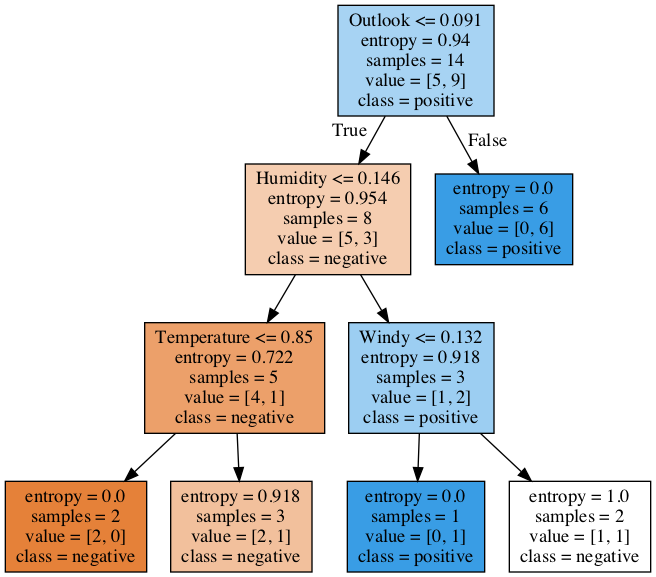

In [80]:
dot_data = tree.export_graphviz(dt, 
                                out_file = None,
                                class_names = ['negative', 'positive'],
                                feature_names = labels[:-1],
                                filled= True
                               )
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())